In [90]:
import os
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [91]:
def getDate(DateString):
    date = DateString.split("-")[0]
    return datetime.datetime.strptime(date, '%Y %b %d')

# Party Affiliation Data

## Data from Gallup Surveys
* Source: https://news.gallup.com/poll/15370/party-affiliation.aspx

In [92]:
df = pd.read_csv('party.csv')
df.columns = ["Date", "Republican", "Independent", "Democrat"]
df["Date"] = df["Date"].apply(getDate)
for year in range(2021,2003,-1):
    select_years = df[df['Date'].dt.year == year]
    display(select_years.loc[select_years["Date"]==select_years["Date"][select_years.index[0]]])


,Date,Republican,Independent,Democrat
0,2021-02-03,26,41,32


,Date,Republican,Independent,Democrat
3,2020-12-01,25,41,31


,Date,Republican,Independent,Democrat
22,2019-12-02,28,41,28


,Date,Republican,Independent,Democrat
43,2018-12-03,26,39,32


,Date,Republican,Independent,Democrat
56,2017-12-04,25,46,27


,Date,Republican,Independent,Democrat
69,2016-12-07,28,39,29


,Date,Republican,Independent,Democrat
86,2015-12-02,27,40,30


,Date,Republican,Independent,Democrat
98,2014-12-08,27,40,31


,Date,Republican,Independent,Democrat
113,2013-12-05,24,44,30


,Date,Republican,Independent,Democrat
126,2012-12-27,27,36,34


,Date,Republican,Independent,Democrat
147,2011-12-15,30,42,27


,Date,Republican,Independent,Democrat
166,2010-12-10,33,34,32


,Date,Republican,Independent,Democrat
188,2009-12-11,29,36,33


,Date,Republican,Independent,Democrat
207,2008-12-12,26,35,37


,Date,Republican,Independent,Democrat
236,2007-12-14,27,39,33


,Date,Republican,Independent,Democrat
263,2006-12-11,30,34,35


,Date,Republican,Independent,Democrat
294,2005-12-19,29,36,32


,Date,Republican,Independent,Democrat
336,2004-12-17,33,30,35


# Line Graphs of Party affilation in the US over time

Text(2021-02-03 00:00:00, 32, '32%')

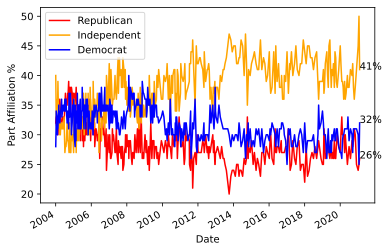

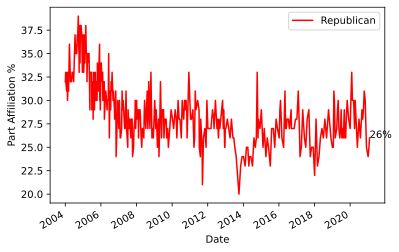

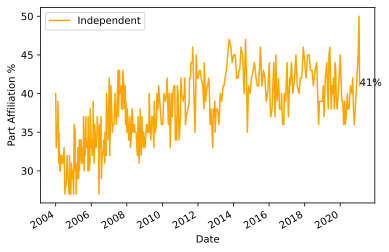

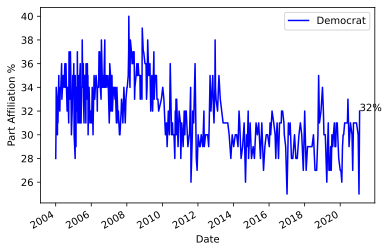

In [93]:
%config InlineBackend.figure_format = 'svg'

#Graph of all parties
all_parties = df.plot(x="Date", y=["Republican", "Independent", "Democrat"], color=["red", "orange", "blue"], ylabel = "Part Affiliation %")

# Graph of Republicans
df_r = df[["Date","Republican"]]
plot_r = df_r.plot(x="Date", y="Republican", color="red", ylabel = "Part Affiliation %")

#Graph of Independent
df_i = df[["Date","Independent"]]
plot_i = df_i.plot(x="Date", y="Independent", color="orange", ylabel = "Part Affiliation %")

# Graph of Democrats
df_d = df[["Date","Democrat"]]
plot_d = df_d.plot(x="Date", y="Democrat", color="blue", ylabel = "Part Affiliation %")

#Annotate Plots
np = df.to_numpy()
li = (list(np[0]))
#Republican Annotate
all_parties.annotate(str(li[1]) + "%", (li[0], li[1]))
plot_r.annotate(str(li[1]) + "%", (li[0], li[1]))
#Independent Annotate
all_parties.annotate(str(li[2]) + "%", (li[0], li[2]))
plot_i.annotate(str(li[2]) + "%", (li[0], li[2]))
#Democrat Annotate
all_parties.annotate(str(li[3]) + "%", (li[0], li[3]))
plot_d.annotate(str(li[3]) + "%", (li[0], li[3]))

# Pie Graphs of party affiliation in selected years (2008,2012,2016,2020)

In [94]:
def getPie(years):
    for year in years:
        include = df[df['Date'].dt.year == year]
        i = len(include)-1 #Get the last index for the given year
        df1 = pd.DataFrame(include.T[include.index[i]],index=["Republican", "Independent", "Democrat"])
        plt = df1.plot.pie(subplots=True,ylabel="Party Affilation in " + str(df["Date"][include.index[i]])[:10],autopct='%1.1f%%',labeldistance=None,colors=["red", "orange", "blue"])


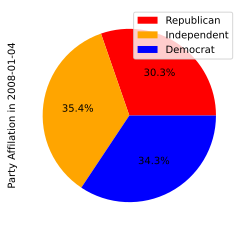

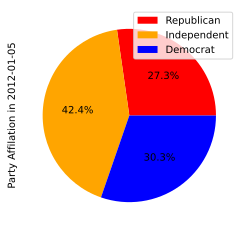

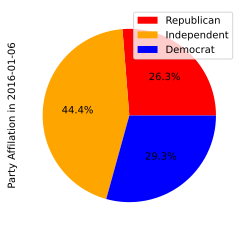

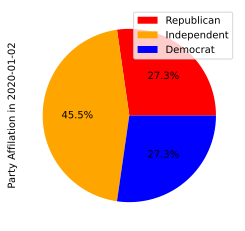

In [95]:
%config InlineBackend.figure_format = 'svg'
getPie(range(2008,2021,4))

In [96]:
os.system('jupyter nbconvert --to html PartyAnalysis.ipynb') #Auto Generate HTML

0